<a href="https://colab.research.google.com/github/und3f1n3d5/BigRational_SE/blob/main/BigRational.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**BigRational**



## **Предисловие**

Исследрвание посвящено реализации длинной арифметике для рациональных чисел. Для этого предварительно реализована целочисленная длинная арифметика. Класс рациональных чисел хранит представление числа в виде обыкновенной несократимой дроби.

Тестирование не только охватывает основную функциональность, но и пристальное внимание уделяет тонким моментам реализации и сложным арифметическим операциям. Также добавлено сравнение времени работы умножения: в реализации класса, во встроенном умножении С++ и со встроенной длинной арифметикой в Python.

## **Функциональность**

\\
### BigInt
* стандартные арифметические операции и операция взятия остатка от делаения
* операции инкремента и декремента, унарные плюс и минус
* операции сравнения
* операция взятия модуля (abs1)
* операция ввода/вывода, а также представление хранимого числа в виде строки
* каст к bool
* конструктор от числа, строки, копирования и присваивания.

\\
### BigRational
* те же, что и у BigInt
* каст к double с кастомной точностью
* приведение к десятичной дроби с кастомной точностью

## **Тестирование**

### Тонкие моменты

BigInt

```
# Check += with different signs
        BigInteger A = 50, B = 3;
        int a = 50, b = 3;
        A += B;
        a += b;
        CHECK(A == a);
        A += -B;
        a -= b;
        CHECK(A == a);
        A = -A;
        A -= -B;
        a = -a;
        a -= -b;
        CHECK(A == a);

# Check operations with +-0
        BigInteger A = 50, B = 0;
        CHECK(A - A + B == B);
        CHECK(B * -1 == B);

```
\\
Rational
```
# check & reduce
        CHECK_THROWS(Rational(1, 0));
        CHECK(Rational(0, 10) == Rational(-0));
        CHECK(Rational(1024, 512) == Rational(2));
        Rational A(18, 16), B(9, -8);
        CHECK(A + B == 0);

# complex operations
        Rational A(1, 2), B(-2, 3);
        double a = 1.0/2, b = -2.0/3;
        A += ++B;
        a += ++b;
        CHECK(abs((double) A - a) < 0.001);
        A *= B++ * 2 + --A - A-- / 3 + A / B;
        a *= b++ * 2 + --a - a-- / 3 + a / b;
        CHECK(std::abs((double) A - a) < 0.001);
```

## **Замеры времени на умножении**

### Прописанное умножение

Умножение выполняется рекурсивно методом Карацубы
```
A0 = A[0 : A.size()/2]  
B0 = B[0 : B.size()/2]

A1 = A[A.size()/2 : end_of_A]  
B1 = B[B.size()/2 : end_of_B]

C0 = A0 * B0 
C1 = A0 * B1
C2 = A1 * B0
*this = A1 * B1 + C0 + C1 + C2;
```
Время: 191121 нс

\\
### Встроенное умножение Python

In [7]:
import time

a = 123456789
b = 987654321

start = time.time_ns()
for i in range(15):
  c = a*b
end = time.time_ns()

print((end - start) / 15, "нс")

6741.6 нс


### Встроенное умножение C++

Время: 6 нс

\\
### График

Text(0, 0.5, 'Time: ns')

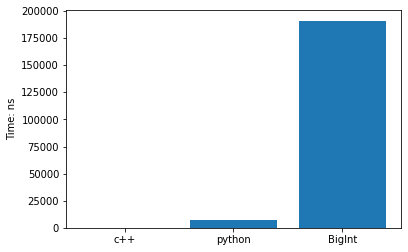

In [11]:
times = [6, 6741.6, 191121]
names = ['c++', 'python', 'BigInt']

import matplotlib.pyplot as plt
plt.bar(names, times);
plt.ylabel('Time: ns')

## **Исходники**

BigInteger, Rational, тесты и CmakeLists: https://github.com/und3f1n3d5/BigRational_SE